# Plots

In [1]:
import sys
sys.path.append('C:/Users/nikol/Documents/GitHub/EnsembleTools')

## Download from Atlas and Load

In [2]:
from dpet.ensemble import Ensemble
from dpet.ensemble_analysis import EnsembleAnalysis
from dpet.visualization import *

ens_codes = [
    Ensemble('PED00424e001', data_path='C:/Users/nikol/Documents/test_dir/ped/PED00424e001.dcd', top_path='C:/Users/nikol/Documents/test_dir/ped/PED00424e001.top.pdb'),
    Ensemble('PED00423e001', data_path='C:/Users/nikol/Documents/test_dir/ped/PED00423e001.dcd', top_path='C:/Users/nikol/Documents/test_dir/ped/PED00423e001.top.pdb')
]
data_dir = 'C:/Users/nikol/Documents/test_dir/ped'

analysis = EnsembleAnalysis(ens_codes, data_dir)
analysis.load_trajectories()

c:\Users\nikol\anaconda3\envs\tensorflowgpu\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Loading trajectory for PED00424e001...
Loading trajectory for PED00423e001...


{'PED00424e001': <mdtraj.Trajectory with 1000 frames, 1374 atoms, 92 residues, without unitcells at 0x17b94dc8640>,
 'PED00423e001': <mdtraj.Trajectory with 1000 frames, 1374 atoms, 92 residues, without unitcells at 0x17ba0e86200>}

In [3]:
vis = Visualization(analysis=analysis)

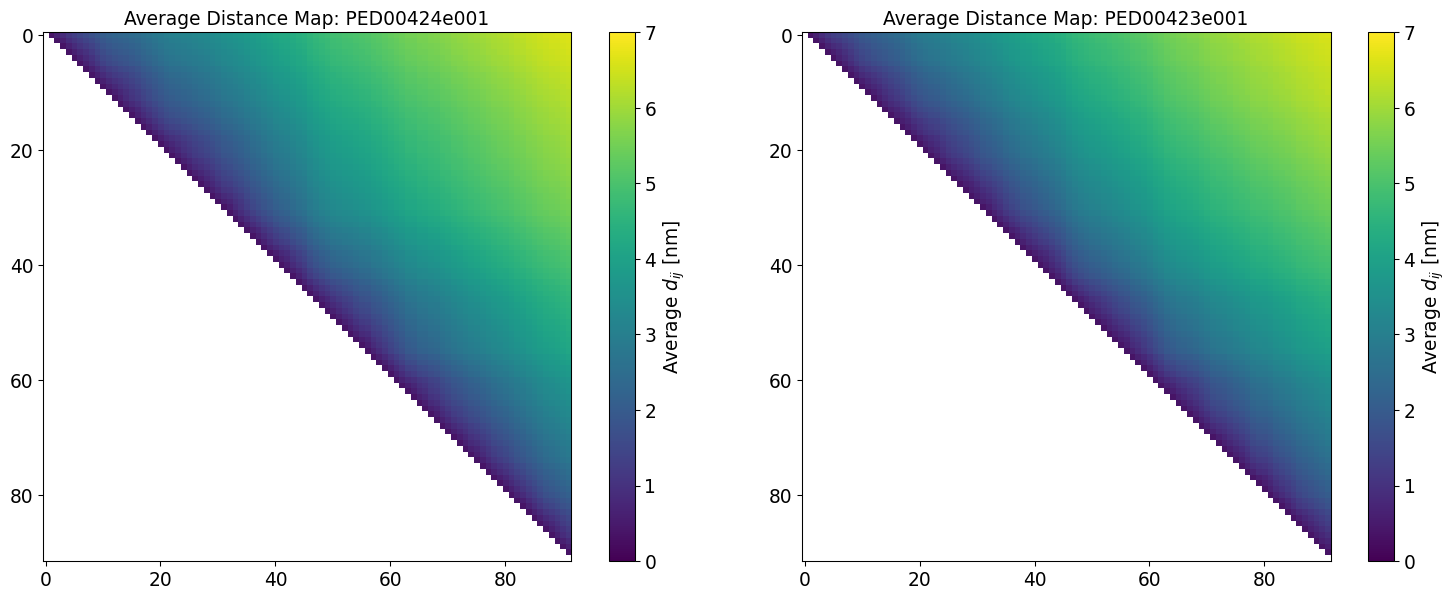

array([[<Axes: title={'center': 'Average Distance Map: PED00424e001'}>,
        <Axes: title={'center': 'Average Distance Map: PED00423e001'}>],
       [<Axes: >, <Axes: >]], dtype=object)

In [4]:
vis.average_distance_maps()

<Axes: title={'center': 'End-to-End distances distribution'}, ylabel='End-to-End distance [nm]'>

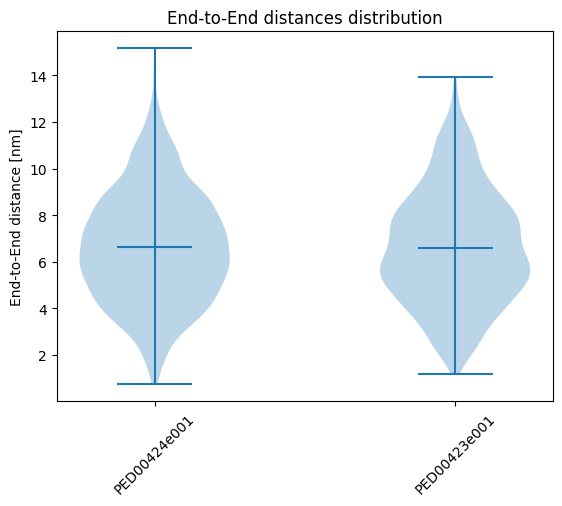

In [5]:
vis.end_to_end_distances(bins=50, violin_plot=True, median=False, means=True)

<Axes: title={'center': 'Asphericity distribution'}, ylabel='Asphericity'>

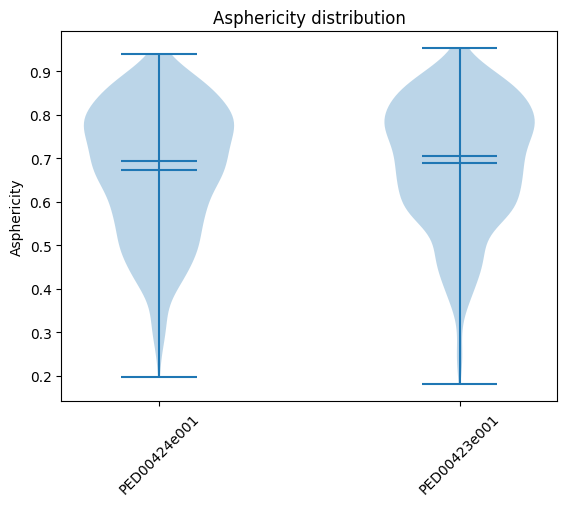

In [6]:
vis.asphericity(bins=10, violin_plot=True)

Pearson coeff for PED00424e001 = 0.767
Pearson coeff for PED00423e001 = 0.767


<Axes: xlabel='$R_g$ [nm]', ylabel='Asphericity'>

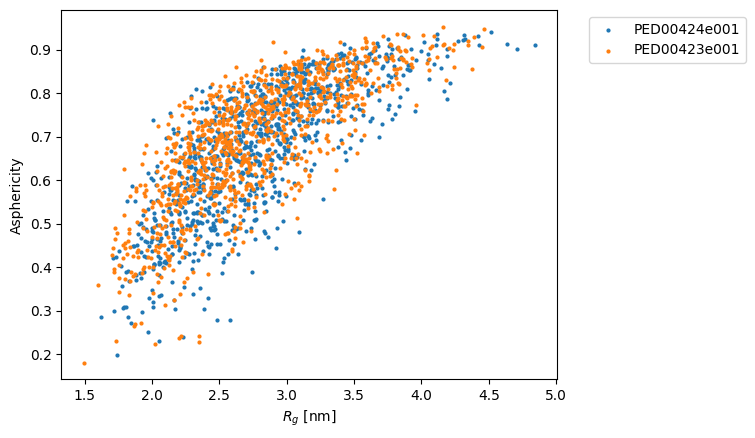

In [7]:
vis.rg_vs_asphericity()

<Axes: title={'center': 'Prolateness distribution'}, ylabel='Prolateness'>

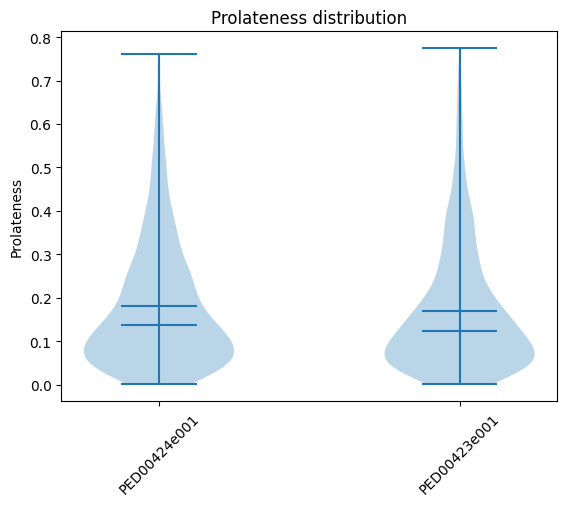

In [8]:
vis.prolateness(bins=10, violin_plot=True, median=True, means=True)

Pearson coeff for PED00424e001 = -0.415
Pearson coeff for PED00423e001 = -0.403


<Axes: xlabel='$R_g$ [nm]', ylabel='Prolateness'>

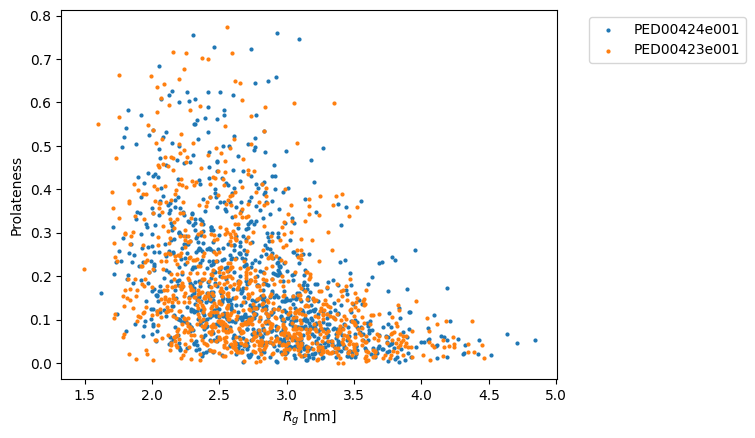

In [9]:
vis.rg_vs_prolateness()

<Axes: title={'center': 'Distribution of alpha angles'}, xlabel='angle [rad]', ylabel='Density'>

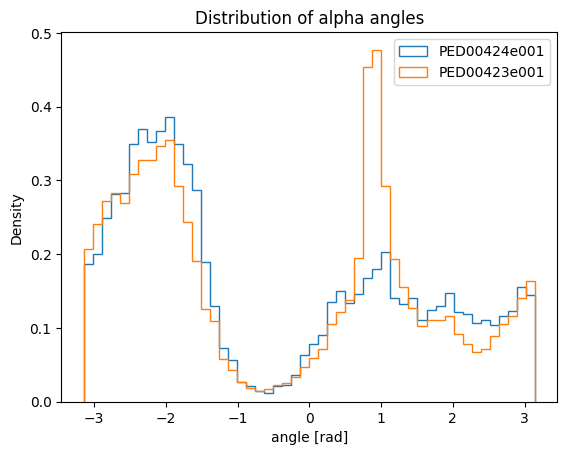

In [10]:
vis.alpha_angles()

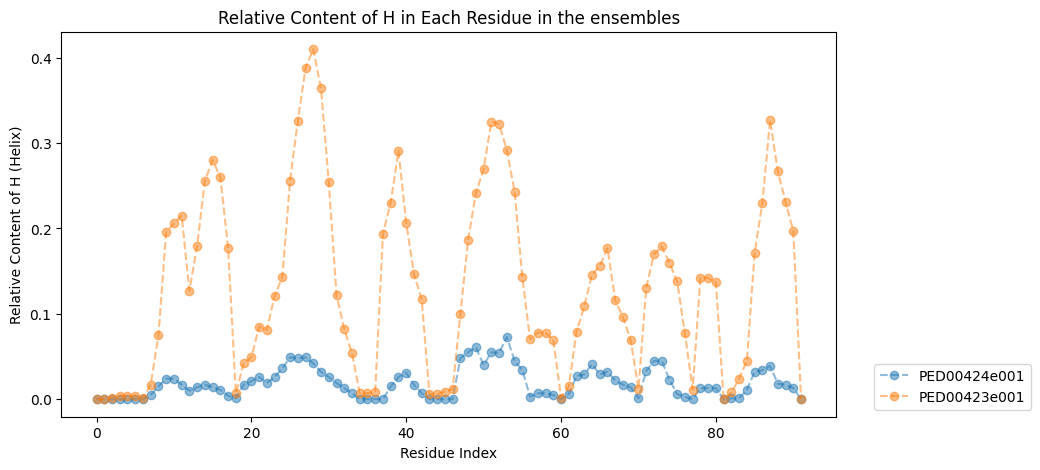

<Axes: title={'center': 'Relative Content of H in Each Residue in the ensembles'}, xlabel='Residue Index', ylabel='Relative Content of H (Helix)'>

In [11]:
vis.relative_helix_content()

<Axes: title={'center': 'Radius of gyration'}, xlabel='$R_g$ [nm]', ylabel='Density'>

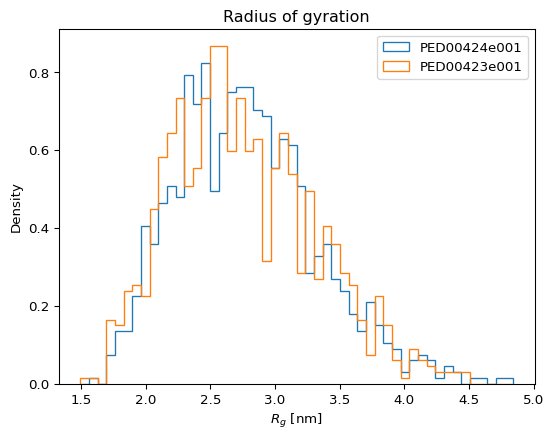

In [12]:
vis.radius_of_gyration()

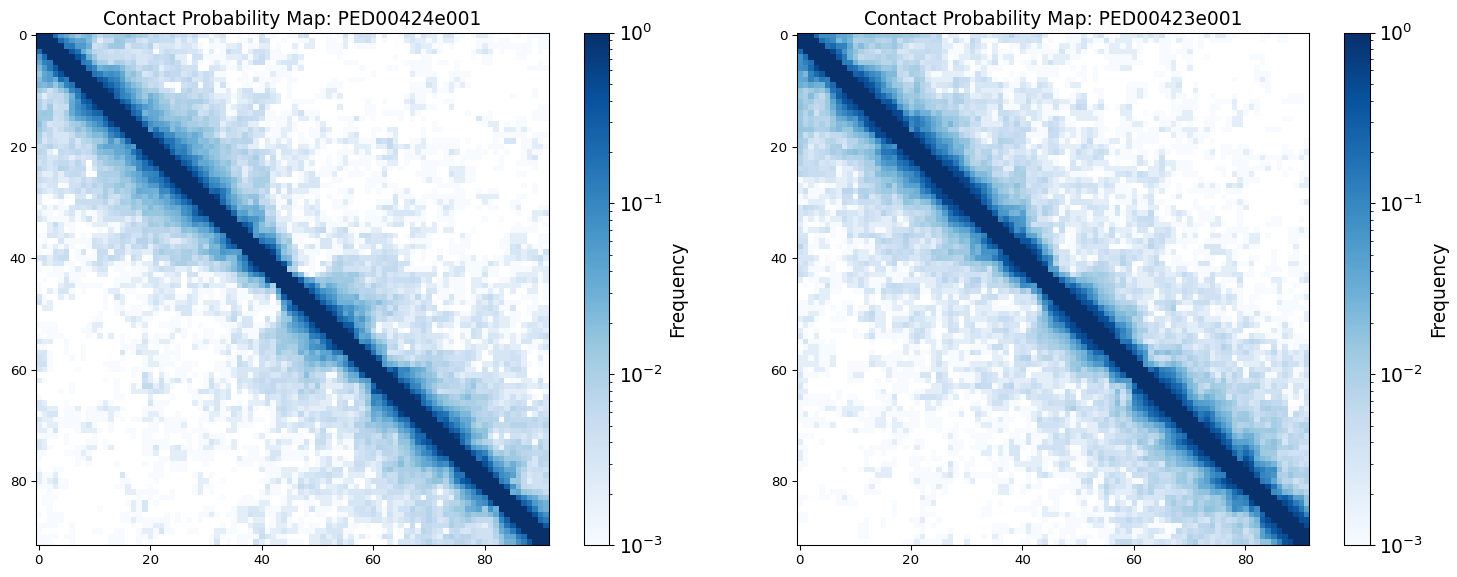

array([[<Axes: title={'center': 'Contact Probability Map: PED00424e001'}>,
        <Axes: title={'center': 'Contact Probability Map: PED00423e001'}>]],
      dtype=object)

In [13]:
vis.contact_prob_maps(threshold=0.8, min_sep=4, cmap_color='Blues', norm=True)

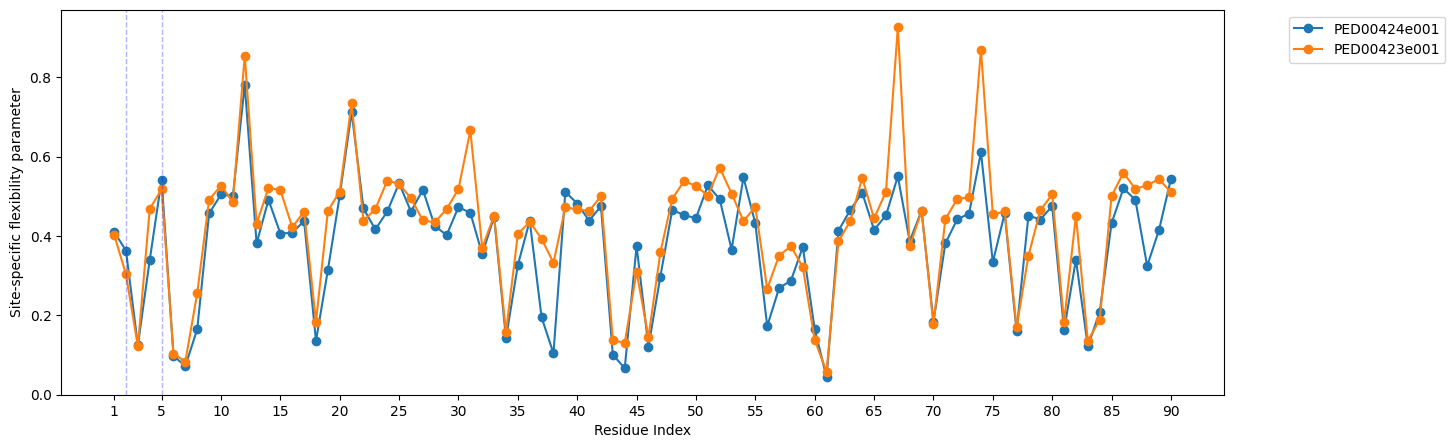

<Axes: xlabel='Residue Index', ylabel='Site-specific flexibility parameter'>

In [14]:
vis.ss_flexibility_parameter(pointer=[2,5])

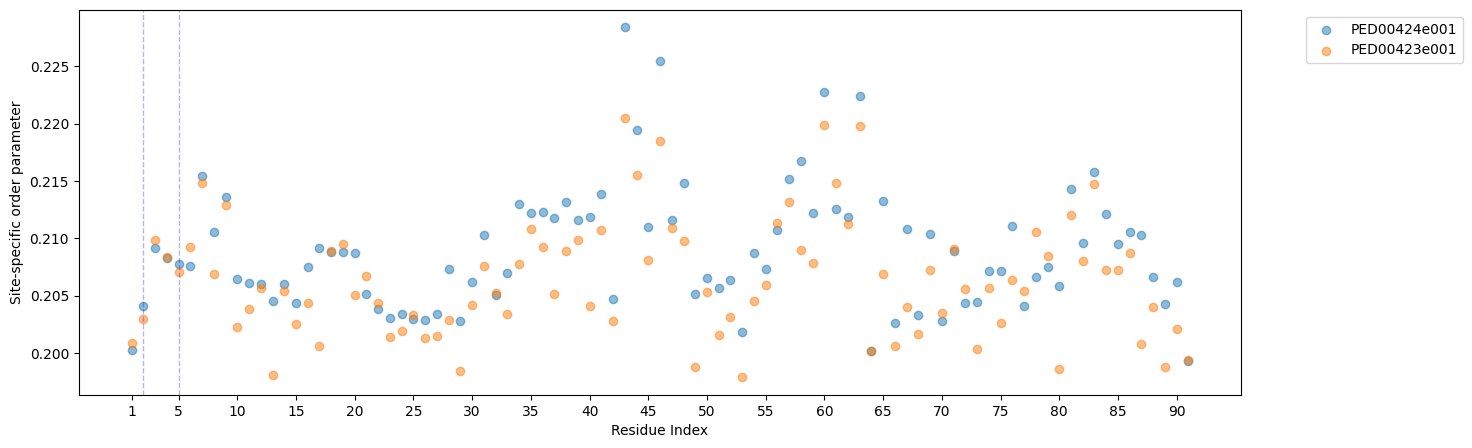

<Axes: xlabel='Residue Index', ylabel='Site-specific order parameter'>

In [15]:
vis.ss_order_parameter(pointer=[5,2])

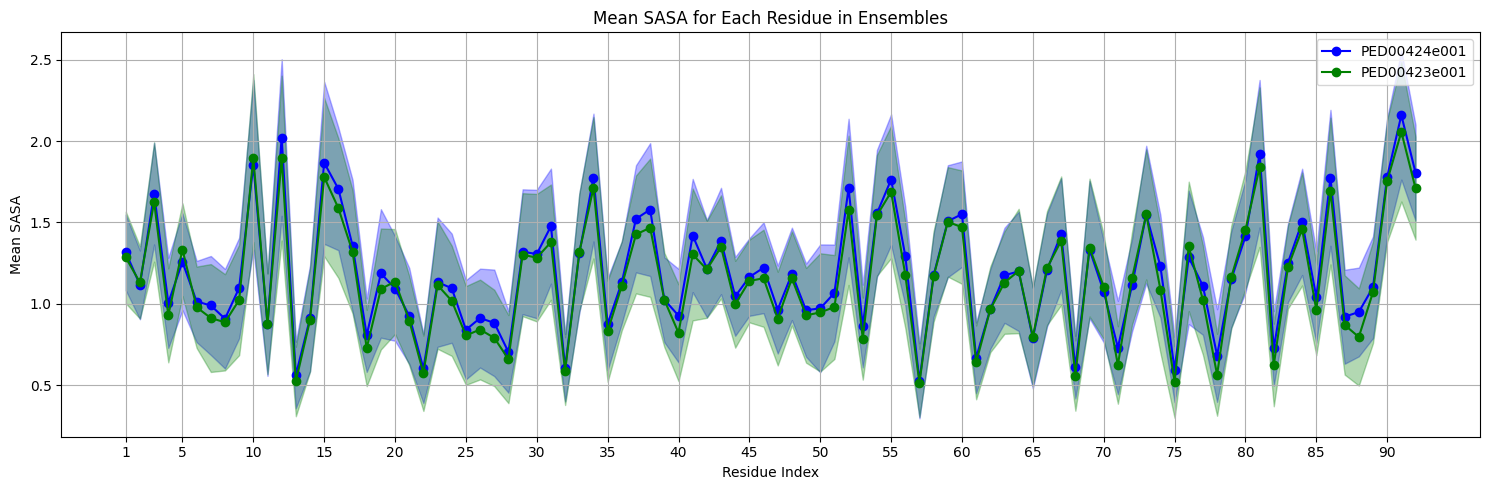

<Axes: title={'center': 'Mean SASA for Each Residue in Ensembles'}, xlabel='Residue Index', ylabel='Mean SASA'>

In [16]:
vis.per_residue_mean_sasa()

# Ensemble: PED00424e001
features: (1000, 4095)
distance matrix: (92, 92)


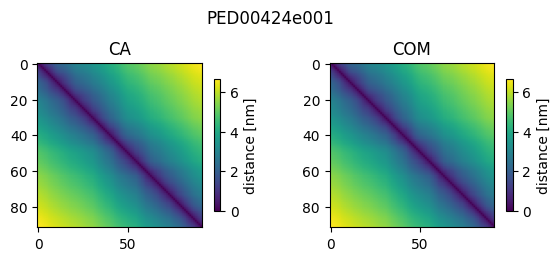

# Ensemble: PED00423e001
features: (1000, 4095)
distance matrix: (92, 92)


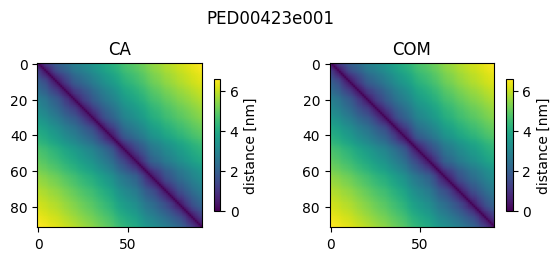

[[<Axes: title={'center': 'CA'}>, <Axes: title={'center': 'COM'}>],
 [<Axes: title={'center': 'CA'}>, <Axes: title={'center': 'COM'}>]]

In [17]:
vis.ca_com_distances(min_sep=2)

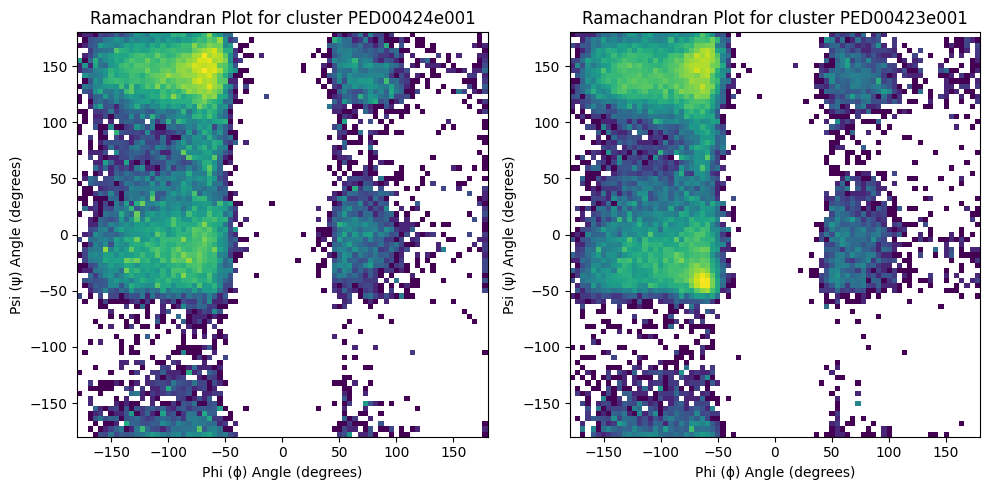

array([<Axes: title={'center': 'Ramachandran Plot for cluster PED00424e001'}, xlabel='Phi (ϕ) Angle (degrees)', ylabel='Psi (ψ) Angle (degrees)'>,
       <Axes: title={'center': 'Ramachandran Plot for cluster PED00423e001'}, xlabel='Phi (ϕ) Angle (degrees)', ylabel='Psi (ψ) Angle (degrees)'>],
      dtype=object)

In [18]:
vis.ramachandran_plots()

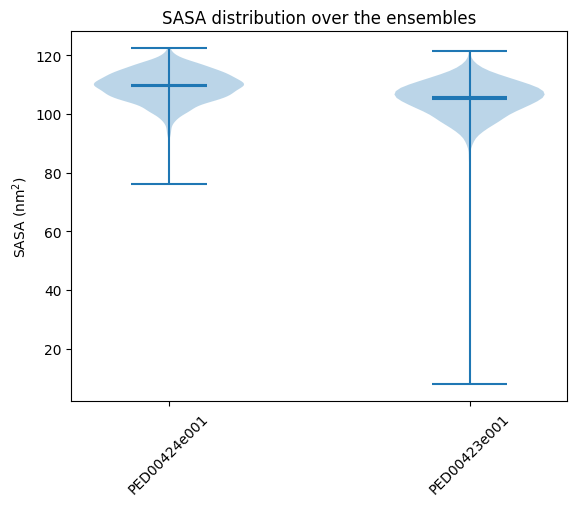

In [19]:
ax_ =vis.ensemble_sasa()